In [2]:
#SVM on Iris flower dataset
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #petal length, petal width
y = (iris["target"] == 2).astype(np.int)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge")) #hinge maximizes the margin
])
svm_clf.fit(X,y)



Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [4]:
svm_clf.predict([[5.5, 1.7]])

array([1])

/Users/gabrielbram/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

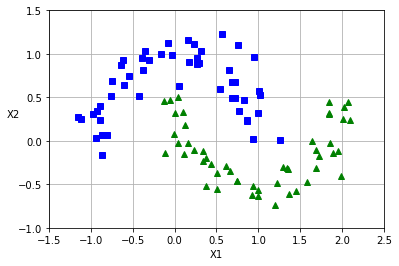

In [16]:
#Testing linear separability on moons dataset
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 

X,y = make_moons(n_samples = 100, noise = 0.15, random_state = 0)

#Plot the data
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y ==0], X[:,1][y == 0], "bs")
    plt.plot(X[:,0][y ==1], X[:,1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel('X1')
    plt.ylabel('X2', rotation = 0)

#Polynomial Pipeline
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss = "hinge"))
])
polynomial_svm_clf.fit(X,y)

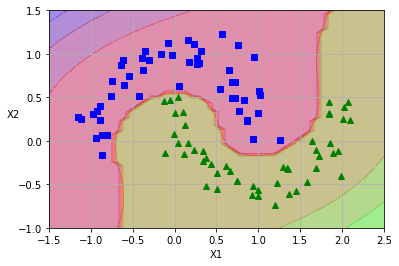

In [36]:
def plot_predictions(clf, axes):
    ##spacing the chart
    x0s = np.linspace(axes[0], axes[1], 50)
    x1s = np.linspace(axes[2], axes[3], 50)
    
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.3)

plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

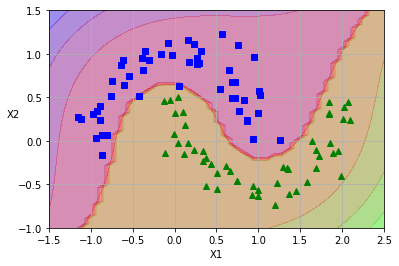

In [43]:
#Using the kernel trick on SVM
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 3, coef0 = 1, C = 5))
])
poly_kernel_svm_clf.fit(X,y)
plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

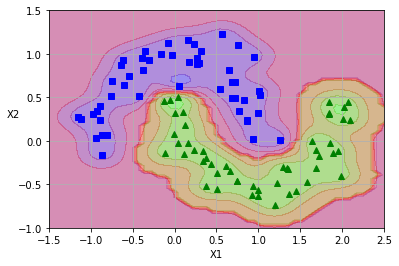

In [49]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma =10, degree = 3, coef0 = 1, C = 5))
])
poly_kernel_svm_clf.fit(X,y)

plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

In [74]:
#Support vector machine regression
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [73]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()


In [75]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

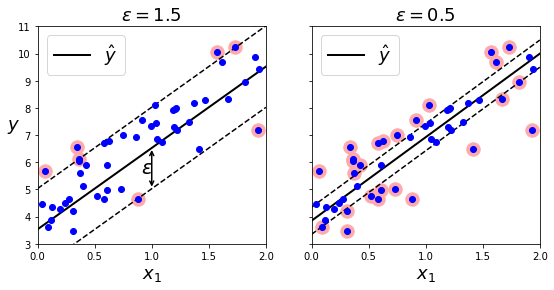

In [77]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

In [79]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1,
                  gamma = 'scale')
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
#Train a linearsvc on a linearly separable dataset
#use the iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #petal length and petal width
y = iris["target"]


In [ ]:
#Train a linearsgdclassifer on linearly separable dataset

In [91]:
iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #petal length, petal width
y = (iris["target"] == 2).astype(np.int)

setosa_or_versicolor = (y ==0) | (y == 1)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [89]:
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])